In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
dados_clientes = pd.read_excel("dados_clientes.xlsx")
estados_brasileiros = pd.read_excel("estados_brasileiros.xlsx")
idade_clientes = pd.read_csv("idade_clientes.csv", sep = ";")

In [ ]:
dados_clientes = dados_clientes.set_index('id_cliente')

In [ ]:
estados_brasileiros = estados_brasileiros.set_index('id_estado')

In [ ]:
idade_clientes = idade_clientes.set_index('id_cliente')

In [ ]:
dados = pd.merge(dados_clientes, idade_clientes, how = 'inner', on = 'id_cliente')
#dados = pd.merge(dados, estados_brasileiros, how = 'right', on = 'id_estado')
#dados.isna().sum()
dados = dados.dropna()
dados

,peso,colesterol,genero,id_estado,idade
id_cliente,,,,,
1,102.0,111,Masculino,23,17
2,115.0,135,Masculino,7,28
3,115.0,136,Masculino,4,62
4,140.0,167,Feminino,24,55
5,130.0,158,Masculino,26,44
...,...,...,...,...,...
543,172.0,207,Masculino,22,20
544,129.0,157,Masculino,1,66
545,107.0,115,Masculino,6,36


In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#dados = dados.drop(columns=['genero','id_estado','idade'])
dados

kmeans = KMeans(n_clusters=4).fit(dados)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
cluster = pd.DataFrame(labels)
print(centroids, labels)

plt.scatter(dados['peso'], dados['colesterol'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()


KeyError: ignored

In [ ]:
#kmeans_label_cluster = KMeans(n_clusters=4, random_state=0)
#label_cluster = kmeans_label_cluster.fit_predict(dados)
#cluster = pd.DataFrame(label_cluster)
#dados_baixo_risco = cluster.query('cluster == 0')
#dados_baixo_risco
#dados_teste = pd.read_excel("Simulação desafio final.xlsx")
#dados_teste
dados
cluster
dadoscomcluster = pd.merge(dados, cluster, how = 'inner', on = 'index')
dadoscomcluster

KeyError: ignored

In [ ]:
cluster

,0
0,1
1,1
2,1
3,3
4,3
...,...
537,0
538,3
539,1
540,3


In [ ]:
#cluster
gbr = []

for i in range(len(dados_baixo_risco)):

  dados_baixo_risco
 

,index,cluster
0,1,2
1,2,2
2,3,2
3,4,0
4,5,0
...,...,...
537,538,1
538,539,0
539,540,2
540,541,0


In [ ]:
estados_brasileiros.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [ ]:
idade_clientes.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [ ]:
dados_clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
teste = dados_clientes.drop(columns=['genero','id_cliente','id_estado'])
teste = teste.dropna()
teste




#dados_completos = dados_completos.join(idade_clientes, lsuffix = 'completos')

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,140.0,167
4,130.0,158
...,...,...
542,172.0,207
543,129.0,157
544,107.0,115
545,117.0,147


[[107.80519481 121.31818182]
 [185.02758621 219.6137931 ]
 [154.85849057 189.67924528]
 [130.64963504 158.09489051]]


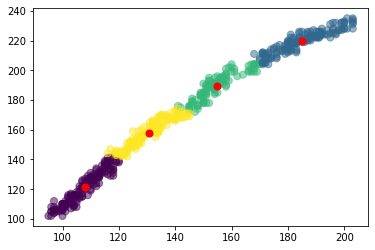

In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#dados_clientes.head()

kmeans = KMeans(n_clusters=4, random_state=0).fit(teste)
#kmeans = KMeans(n_clusters=4).fit(teste)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(teste['peso'], teste['colesterol'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [ ]:
teste = teste.sort_values(by=['colesterol'], ascending=True)
teste

,peso,colesterol
24,95.0,102
12,96.0,102
242,100.0,102
127,97.0,104
139,97.0,104
...,...,...
151,200.0,233
331,203.0,233
482,203.0,234
252,201.0,235


In [ ]:
wcss_saude = []

for i in range(1,15):

  kmeans_teste = KMeans(n_clusters=i, random_state=0)
  kmeans_teste.fit(teste)
  wcss_saude.append(kmeans_teste.inertia_)

for i in range(len(wcss_saude)):
  print('Cluster:', i, '- valor wcss:', wcss_saude[i])


Cluster: 0 - valor wcss: 1345138.9833948342
Cluster: 1 - valor wcss: 326459.1691111843
Cluster: 2 - valor wcss: 138700.76622385823
Cluster: 3 - valor wcss: 80254.74760725317
Cluster: 4 - valor wcss: 53121.81831667358
Cluster: 5 - valor wcss: 37038.610748428044
Cluster: 6 - valor wcss: 27278.36219362228
Cluster: 7 - valor wcss: 21793.599301067796
Cluster: 8 - valor wcss: 16998.44788539939
Cluster: 9 - valor wcss: 14448.986400197677
Cluster: 10 - valor wcss: 12568.766305635465
Cluster: 11 - valor wcss: 10775.164523366439
Cluster: 12 - valor wcss: 9407.751975578061
Cluster: 13 - valor wcss: 8572.656215766852


In [ ]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()
teste_norm = norm.fit_transform(teste)
teste.head()
teste_norm

array([[-1.34511853, -1.51422421],
       [-0.92315579, -0.90118255],
       [-0.92315579, -0.87563915],
       ...,
       [-1.18282517, -1.4120506 ],
       [-0.85823844, -0.59466172],
       [ 0.14798041,  0.14609695]])

In [ ]:
wcss_saude_teste = []

for i in range(1,15):

  kmeans_teste = KMeans(n_clusters=i, random_state=0)
  kmeans_teste.fit(teste_norm)
  wcss_saude_teste.append(kmeans_teste.inertia_)

for i in range(len(wcss_saude)):
  print('Cluster:', i, '- valor wcss:', wcss_saude_teste[i])

Cluster: 0 - valor wcss: 1083.999999999999
Cluster: 1 - valor wcss: 262.9529011927892
Cluster: 2 - valor wcss: 111.65632318955922
Cluster: 3 - valor wcss: 65.1033714854396
Cluster: 4 - valor wcss: 44.289398057720206
Cluster: 5 - valor wcss: 29.945052903039446
Cluster: 6 - valor wcss: 22.43490789452764
Cluster: 7 - valor wcss: 17.948072963979172
Cluster: 8 - valor wcss: 13.824476858621374
Cluster: 9 - valor wcss: 11.713739044492277
Cluster: 10 - valor wcss: 10.12492371454211
Cluster: 11 - valor wcss: 8.709839218162575
Cluster: 12 - valor wcss: 7.6601983774730575
Cluster: 13 - valor wcss: 6.893909063083134


In [ ]:
import plotly.express as px
grafico_cotovelo = px.line(x=range(1,15), y=wcss_saude)
grafico_cotovelo.show()

[[107.80519481 121.31818182]
 [185.02758621 219.6137931 ]
 [154.85849057 189.67924528]
 [130.64963504 158.09489051]]


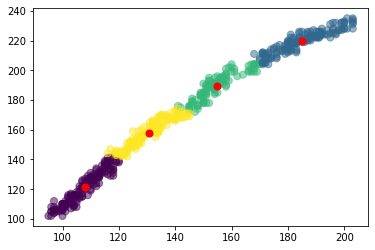

In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#dados_clientes.head()

kmeans = KMeans(n_clusters=4, random_state=0).fit(teste)
#kmeans = KMeans(n_clusters=4).fit(teste)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(teste['peso'], teste['colesterol'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

[[130.64963504 158.09489051]
 [185.02758621 219.6137931 ]
 [107.80519481 121.31818182]
 [154.85849057 189.67924528]]


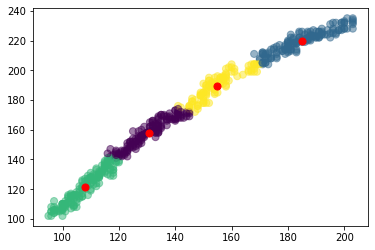

In [ ]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#dados_clientes.head()

#kmeans = KMeans(n_clusters=4, random_state=0).fit(teste)
kmeans = KMeans(n_clusters=4).fit(teste)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(teste['peso'], teste['colesterol'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [ ]:
kmeans_label_cluster = KMeans(n_clusters=4, random_state=0)
label_cluster = kmeans_label_cluster.fit_predict(teste)
cluster = pd.DataFrame(label_cluster)
cluster

,0
0,0
1,0
2,0
3,3
4,3
...,...
537,1
538,3
539,0
540,3


In [ ]:
cluster

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8eb114d350>]],
      dtype=object)

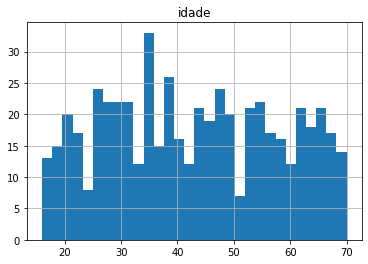

In [ ]:
idade_clientes.hist(column = 'idade', bins=30)

In [ ]:
import numpy as np

a = np.array((188, 185.027586212))
b = np.array((222, 219.6137931))

dist = np.linalg.norm(a-b)
dist

48.49954336794873